##### Copyright 2018 The TensorFlow Authors.

In [1]:
%load_ext autoreload
%autoreload 2

# Treine sua primeira rede neural: classificação básica

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

O guia usa [tf.keras](https://www.tensorflow.org/guide/keras), uma API alto-nível para construir e treinar modelos no TensorFlow.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


## Testando o mnist clássico dos números

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1) # versao 28x28

In [8]:
_N = int(mnist.data.shape[0]*0.8)
x_train, y_train = mnist.data[:_N], mnist.target[:_N].astype(np.uint8)
x_test, y_test = mnist.data[_N:], mnist.target[_N:].astype(np.uint8)

# deixando os vetores nos formatos corretos pra usar no keras
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #784
    keras.layers.Dense(512, activation='elu'),
    keras.layers.Dense(256, activation='elu'),
    keras.layers.Dense(128, activation='elu'),
    #keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs=25) # mais do que 25 é inútil

Epoch 1/25
56000/56000 [==============================] - 11s 197us/sample - loss: 0.9962 - acc: 0.8982
Epoch 2/25
56000/56000 [==============================] - 11s 198us/sample - loss: 0.1900 - acc: 0.9488
Epoch 3/25
56000/56000 [==============================] - 12s 207us/sample - loss: 0.1502 - acc: 0.9580
Epoch 4/25
56000/56000 [==============================] - 11s 188us/sample - loss: 0.1291 - acc: 0.9646
Epoch 5/25
56000/56000 [==============================] - 10s 181us/sample - loss: 0.1122 - acc: 0.9683
Epoch 6/25
56000/56000 [==============================] - 11s 194us/sample - loss: 0.1009 - acc: 0.9721
Epoch 7/25
56000/56000 [==============================] - 11s 201us/sample - loss: 0.0938 - acc: 0.9747
Epoch 8/25
56000/56000 [==============================] - 11s 199us/sample - loss: 0.0858 - acc: 0.9779
Epoch 9/25
56000/56000 [==============================] - 11s 189us/sample - loss: 0.0750 - acc: 0.9810
Epoch 10/25
56000/56000 [==============================] - 10s 1

In [34]:
test_loss, test_acc = model.evaluate(x_train, y_train, verbose=2)

56000/56000 - 5s - loss: 0.0337 - acc: 0.9937


In [35]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

14000/14000 - 1s - loss: 0.2187 - acc: 0.9760


In [36]:
preditions = model.predict(x_test)

# meu próprio one-hot das 10 classes de números
y_pred = []
for y in preditions:
    y_max = np.argmax(y)
    y_pred.append([y_max])
y_pred = np.array(y_pred).reshape(-1, 1)

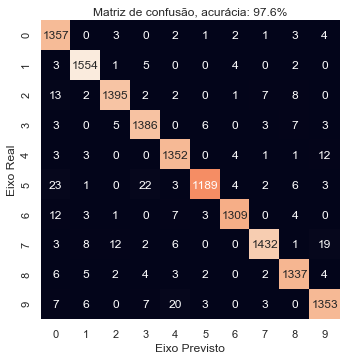

In [37]:
from scores import Scores

score = Scores(y_test, y_pred)
score.exibir_grafico()

## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels).

Fashion MNIST tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/ )— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (*machine learning*) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a Fashion MNIST para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST directly diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores des pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [7]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjnto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [10]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

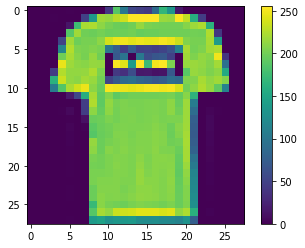

In [12]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

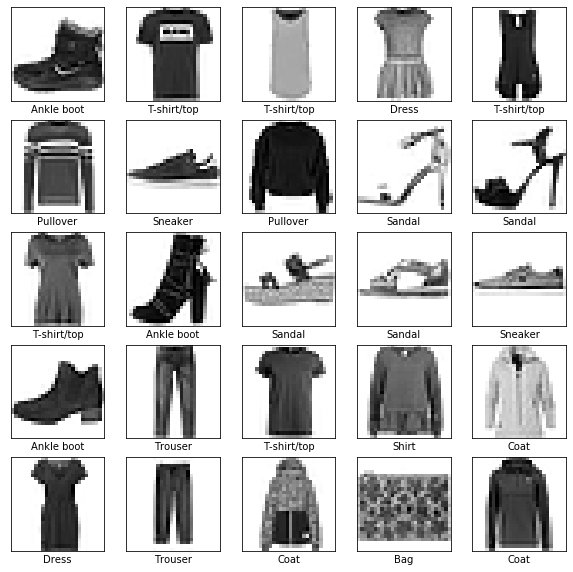

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])#, cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do *deep learning* consiste encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem paramêtros que são aprendidos durante o treinamento.

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #784
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os emfilere. Essa camada não tem paramêtros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consite de uma sequência de duas camadas `tf.keras.layers.Dense`. Essa são camadas neurais *densely connected*, ou *fully connected*. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camda é uma *softmax*  de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para direção certa.
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [45]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.4714 - acc: 0.8291
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3614 - acc: 0.8676
Epoch 3/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3251 - acc: 0.8806
Epoch 4/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3016 - acc: 0.8879
Epoch 5/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2869 - acc: 0.8930
Epoch 6/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2690 - acc: 0.8992
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2554 - acc: 0.9032
Epoch 8/10
60000/60000 [==============================] - 9s 156us/sample - loss: 0.2471 - acc: 0.9062
Epoch 9/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2353 - acc: 0.9106
Epoch 10/10
60000/60000 [==============================] - 9s 151us/sampl

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.915 (ou 91.5%) com o conjunto de treinamento.

## Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 0s - loss: 0.3492 - acc: 0.8909


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Faça predições

Com o modelo treinado, o usaremos para predições de algumas imagens.
Aqui, o modelo previu que a *label*  de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [49]:
predictions = model.predict(test_images)
predictions[0]

array([6.3709162e-09, 1.7573402e-07, 8.8697734e-09, 2.7233458e-09,
       3.2655709e-10, 3.6782939e-03, 3.2887030e-07, 6.3585707e-05,
       8.7555927e-09, 9.9625754e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [50]:
np.argmax(predictions[0])

9